In [1]:
import pandas as pd
from sqlalchemy import create_engine
#need to remember to enter passward for postgres below

In [2]:
##Extract csvs into dataframes
virus_data = "csse_covid_19_data/csse_covid_19_daily_reports/03-09-2020.csv"
virus_df = pd.read_csv(virus_data)
virus_df.head()


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-09T14:33:03,67743,3008,46488,30.9756,112.2707
1,NaN,Italy,2020-03-09T18:13:11,9172,463,724,43.0000,12.0000
2,NaN,South Korea,2020-03-09T09:03:03,7478,53,118,36.0000,128.0000
3,NaN,Iran,2020-03-09T10:53:03,7161,237,2394,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-09T01:43:01,1352,8,1260,23.3417,113.4244


In [3]:
#cleaning up data so that country names match
virus_dfa=virus_df.replace(to_replace =["Mainland China"],  
                            value ="China") 
virus_dfb=virus_dfa.replace(to_replace =["US"],  
                            value ="United States")
virus_df=virus_dfb.replace(to_replace =["UK"],  
                            value ="United Kingdom") 

virus_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-09T14:33:03,67743,3008,46488,30.9756,112.2707
1,NaN,Italy,2020-03-09T18:13:11,9172,463,724,43.0000,12.0000
2,NaN,South Korea,2020-03-09T09:03:03,7478,53,118,36.0000,128.0000
3,NaN,Iran,2020-03-09T10:53:03,7161,237,2394,32.0000,53.0000
4,Guangdong,China,2020-03-09T01:43:01,1352,8,1260,23.3417,113.4244


In [4]:
virus_df.count()

Province/State    163
Country/Region    266
Last Update       266
Confirmed         266
Deaths            266
Recovered         266
Latitude          266
Longitude         266
dtype: int64

In [5]:
virus_df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,266.000000,266.000000,266.000000,266.000000,266.000000
mean,427.000000,15.022556,235.007519,32.673395,-14.862858
std,4232.741547,186.974682,2856.465647,18.930695,88.508896
min,0.000000,0.000000,0.000000,-41.454500,-157.858400
25%,1.000000,0.000000,0.000000,29.066800,-86.952350
50%,4.000000,0.000000,0.000000,37.458550,-35.473050
75%,32.000000,0.000000,1.000000,42.395425,52.545975
max,67743.000000,3008.000000,46488.000000,64.963100,174.886000


In [6]:
##Extract csvs into dataframes
air_data = "air-pollution.csv"
air_df = pd.read_csv(air_data)
air_df.head()


,Entity,Code,Year,Share of deaths from air pollution (%)
0,Afghanistan,AFG,1990,13.56
1,Afghanistan,AFG,1991,13.19
2,Afghanistan,AFG,1992,13.05
3,Afghanistan,AFG,1993,12.88
4,Afghanistan,AFG,1994,12.80


In [7]:
air_means = air_df.groupby("Entity").mean()["Share of deaths from air pollution (%)"]
air_df2 = pd.DataFrame(air_means)
air_df2.head()

,Share of deaths from air pollution (%)
Entity,
Afghanistan,12.407143
Africa,7.491429
Albania,9.105357
Algeria,7.127857
American Samoa,7.305357


In [8]:
air_df2.reset_index()
type(air_df2)

pandas.core.frame.DataFrame

In [9]:
air_df2 = air_df2.rename(columns={0:"Country/Region"})
air_df2.head()

,Share of deaths from air pollution (%)
Entity,
Afghanistan,12.407143
Africa,7.491429
Albania,9.105357
Algeria,7.127857
American Samoa,7.305357


In [10]:
virus_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-09T14:33:03,67743,3008,46488,30.9756,112.2707
1,NaN,Italy,2020-03-09T18:13:11,9172,463,724,43.0000,12.0000
2,NaN,South Korea,2020-03-09T09:03:03,7478,53,118,36.0000,128.0000
3,NaN,Iran,2020-03-09T10:53:03,7161,237,2394,32.0000,53.0000
4,Guangdong,China,2020-03-09T01:43:01,1352,8,1260,23.3417,113.4244


In [11]:
#grouping virus stats by country
vir_sums = virus_df.groupby("Country/Region").sum()["Confirmed"]
vir_sums = pd.DataFrame(vir_sums)
vir_sums2 = virus_df.groupby("Country/Region").sum()["Deaths"]
vir_sums2 = pd.DataFrame(vir_sums2)
vir_sums3 = virus_df.groupby("Country/Region").sum()["Recovered"]
vir_sums3 = pd.DataFrame(vir_sums3)


vir_sums.head()

,Confirmed
Country/Region,
Afghanistan,4
Albania,2
Algeria,20
Andorra,1
Argentina,12


In [12]:
#Merge dataframes for all virus sums
merged_df = pd.merge(vir_sums,vir_sums2,on='Country/Region',how='inner')
merged_df = pd.merge(merged_df,vir_sums3,on='Country/Region',how='inner')
merged_df.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,4,0,0
Albania,2,0,0
Algeria,20,0,0
Andorra,1,0,0
Argentina,12,1,0


In [13]:
merged_df.sort_values(["Country/Region"], axis=0, 
                 ascending=True, inplace=True) 
merged_df.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,4,0,0
Albania,2,0,0
Algeria,20,0,0
Andorra,1,0,0
Argentina,12,1,0


In [14]:
merged_df['Recovered from Confirmed']=merged_df['Recovered']/merged_df['Confirmed']
merged_df.head()

,Confirmed,Deaths,Recovered,Recovered from Confirmed
Country/Region,,,,
Afghanistan,4,0,0,0.0
Albania,2,0,0,0.0
Algeria,20,0,0,0.0
Andorra,1,0,0,0.0
Argentina,12,1,0,0.0


In [15]:
merged_df['Deaths from Confirmed']=merged_df['Deaths']/merged_df['Confirmed']
merged_df.head()

,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed
Country/Region,,,,,
Afghanistan,4,0,0,0.0,0.000000
Albania,2,0,0,0.0,0.000000
Algeria,20,0,0,0.0,0.000000
Andorra,1,0,0,0.0,0.000000
Argentina,12,1,0,0.0,0.083333


In [16]:
#merge air data with coronavirus stats
finalmerge = pd.merge(merged_df,air_df2,how='left',left_index=True, right_index=True)
finalmerge.head()

,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed,Share of deaths from air pollution (%)
Country/Region,,,,,,
Afghanistan,4,0,0,0.0,0.000000,12.407143
Albania,2,0,0,0.0,0.000000,9.105357
Algeria,20,0,0,0.0,0.000000,7.127857
Andorra,1,0,0,0.0,0.000000,4.915000
Argentina,12,1,0,0.0,0.083333,5.787143


In [17]:
finalmerge['World Wide Average air pollution (%)']=finalmerge['Share of deaths from air pollution (%)'].mean()
finalmerge.head()

,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed,Share of deaths from air pollution (%),World Wide Average air pollution (%)
Country/Region,,,,,,,
Afghanistan,4,0,0,0.0,0.000000,12.407143,7.124683
Albania,2,0,0,0.0,0.000000,9.105357,7.124683
Algeria,20,0,0,0.0,0.000000,7.127857,7.124683
Andorra,1,0,0,0.0,0.000000,4.915000,7.124683
Argentina,12,1,0,0.0,0.083333,5.787143,7.124683


In [18]:
finalmerge['Percentage over world wide avg']=finalmerge['Share of deaths from air pollution (%)']-finalmerge['World Wide Average air pollution (%)']
finalmerge.head()

,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed,Share of deaths from air pollution (%),World Wide Average air pollution (%),Percentage over world wide avg
Country/Region,,,,,,,,
Afghanistan,4,0,0,0.0,0.000000,12.407143,7.124683,5.282459
Albania,2,0,0,0.0,0.000000,9.105357,7.124683,1.980674
Algeria,20,0,0,0.0,0.000000,7.127857,7.124683,0.003174
Andorra,1,0,0,0.0,0.000000,4.915000,7.124683,-2.209683
Argentina,12,1,0,0.0,0.083333,5.787143,7.124683,-1.337541


In [19]:
#saving as csv to play with tableau while postgres updates package
finalmerge.to_csv('merged_corona.csv', header=False, index=True) 

In [20]:
# ##Create Database Connection
# connection_string = "postgres:<password-goes-here>@localhost:5432/ETLProject_db"
# engine = create_engine(f'postgresql://{connection_string}')

# # Confirm tables
# engine.table_names()


# ##Load DataFrames into database
# suicidefinal.to_sql(name='suicide', con=engine, if_exists='append', index=True)

# gdp_transformed.to_sql(name='gdp', con=engine, if_exists='append', index=True)


In [21]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [22]:
finalmerge.sort_values(["Confirmed"], axis=0, 
                 ascending=False, inplace=True) 

In [23]:
finalmerge.head(15)


,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed,Share of deaths from air pollution (%),World Wide Average air pollution (%),Percentage over world wide avg
Country/Region,,,,,,,,
China,80735,3120,58735,0.727504,0.038645,14.219286,7.124683,7.094602
Italy,9172,463,724,0.078936,0.050480,5.363214,7.124683,-1.761469
South Korea,7478,53,118,0.015780,0.007087,5.958214,7.124683,-1.166469
Iran,7161,237,2394,0.334311,0.033096,6.844643,7.124683,-0.280041
France,1209,19,12,0.009926,0.015715,3.932500,7.124683,-3.192183
Germany,1176,2,18,0.015306,0.001701,5.282857,7.124683,-1.841826
Spain,1073,28,32,0.029823,0.026095,4.907500,7.124683,-2.217183
Others,696,6,40,0.057471,0.008621,NaN,7.124683,NaN
United States,605,22,8,0.013223,0.036364,4.644643,7.124683,-2.480041


In [24]:
for_graphs = finalmerge.iloc[0:14,:]
for_graphs

,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed,Share of deaths from air pollution (%),World Wide Average air pollution (%),Percentage over world wide avg
Country/Region,,,,,,,,
China,80735,3120,58735,0.727504,0.038645,14.219286,7.124683,7.094602
Italy,9172,463,724,0.078936,0.050480,5.363214,7.124683,-1.761469
South Korea,7478,53,118,0.015780,0.007087,5.958214,7.124683,-1.166469
Iran,7161,237,2394,0.334311,0.033096,6.844643,7.124683,-0.280041
France,1209,19,12,0.009926,0.015715,3.932500,7.124683,-3.192183
Germany,1176,2,18,0.015306,0.001701,5.282857,7.124683,-1.841826
Spain,1073,28,32,0.029823,0.026095,4.907500,7.124683,-2.217183
Others,696,6,40,0.057471,0.008621,NaN,7.124683,NaN
United States,605,22,8,0.013223,0.036364,4.644643,7.124683,-2.480041


In [32]:
finalmerge.sort_values(["Percentage over world wide avg"], axis=0, 
                 ascending=False, inplace=True) 
finalmerge.head(15)

,Confirmed,Deaths,Recovered,Recovered from Confirmed,Deaths from Confirmed,Share of deaths from air pollution (%),World Wide Average air pollution (%),Percentage over world wide avg
Country/Region,,,,,,,,
China,80735,3120,58735,0.727504,0.038645,14.219286,7.124683,7.094602
Nepal,1,0,1,1.000000,0.000000,13.179643,7.124683,6.054959
Bangladesh,3,0,0,0.000000,0.000000,12.783214,7.124683,5.658531
Afghanistan,4,0,0,0.000000,0.000000,12.407143,7.124683,5.282459
Cambodia,2,0,1,0.500000,0.000000,12.255714,7.124683,5.131031
India,43,0,3,0.069767,0.000000,12.158571,7.124683,5.033888
Bahrain,95,0,14,0.147368,0.000000,11.472500,7.124683,4.347817
Egypt,55,1,12,0.218182,0.018182,11.456429,7.124683,4.331745
Armenia,1,0,0,0.000000,0.000000,10.642143,7.124683,3.517459


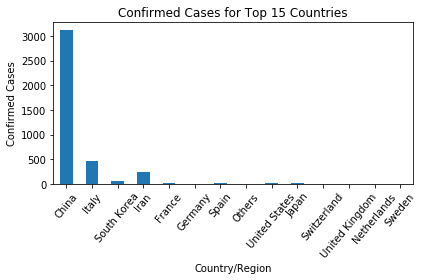

In [29]:
# Generate a bar plot showing number of data points for each 
#treatment regimen using pandas

# datapts2 = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
# forpanbar = pd.DataFrame(datapts2)
# #newtry = forpanbar.reset_index()
# #newtry

for_bar = for_graphs.iloc[:,1]

also = for_bar.plot.bar(legend=False,rot=50)
also
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases for Top 15 Countries")
plt.tight_layout()
plt.savefig('Confirmed_Cases_Top_15')

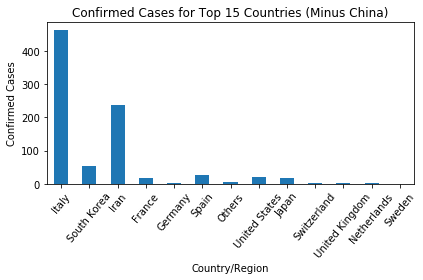

In [28]:
#without China to skew graph
for_bar2 = for_graphs.iloc[1:14,1]

also = for_bar2.plot.bar(legend=False,rot=50)
also
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases for Top 15 Countries (Minus China)")
plt.tight_layout()
plt.savefig('Confirmed_Cases_Minus_China')

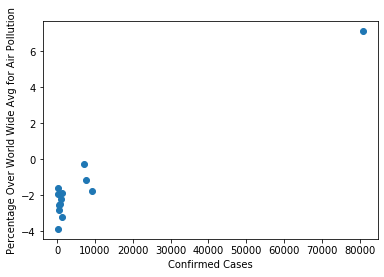

In [27]:
plt.scatter(for_graphs['Confirmed'],for_graphs['Percentage over world wide avg'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Percentage Over World Wide Avg for Air Pollution')

plt.savefig('scatterplot')
plt.show()

In [ ]:
for_graphs.dropna()

In [ ]:
import seaborn as sns
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr


#correration matrix
corrmat = for_graphs.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();
plt.tight_layout()
#plt.savefig('heatmapafternorm')

In [ ]:
#correration matrix for full data with all countries
corrmat = finalmerge.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();
plt.tight_layout()
#plt.savefig('heatmapafternorm')

In [ ]:
corr = for_graphs.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.tight_layout()
#plt.savefig('corrmatrixafternorm')

In [ ]:
#matrix with all countries, not just top 15
corr = finalmerge.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.tight_layout()
#plt.savefig('corrmatrixafternorm')

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# corr=round(st.pearsonr(finalmerge['Confirmed'],finalmerge['Percentage over world wide avg'])[0],2)
# print(f"The correlation between mouse weight and average tumor volume is {corr}")

In [ ]:
# model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
# model

In [ ]:
#capavg['Weight (g)']
# mslope = 0.9544396890241045
# bintercept = 21.552160532685015

In [ ]:
# y_values = capavg['Weight (g)']*mslope+bintercept
# plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
# plt.plot(capavg['Weight (g)'],y_values,color="red")
# plt.xlabel('Weight(g)')
# plt.ylabel('Average Tumore Volume (mm3)')

# plt.savefig('linearregression')
# plt.show()